# Bird Species Prediction

In this project, a convolutional neural network that can predict bird species will be built. This multiclass classification model will be built, trained, and tested using several layers and other hyperparameters. For this project, keras will be used.

In [ ]:
#Author: Varun Ram S 20BAC10038

In [ ]:
#import zipfile as zf
#files=zf.ZipFile("birds.zip")
#files.extractall("birds")
#files.close()

In [ ]:
# Load the Drive helper and mount
#from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')

First we will mount our google drive on colab so that we can use the dataset directly from our drive. For this you first need to upload the data on your drive and then mount the drive on colab.

In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
#!ls "/content/drive/My Drive"

After mounting our drive we will locate the folder where our data is stored to use it in our colab notebook. Here you can see that all the folders I have in my drive and 'Bird Species Dataset' contains the images that we will work on.

In [ ]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

We will start by importing some required libraries.

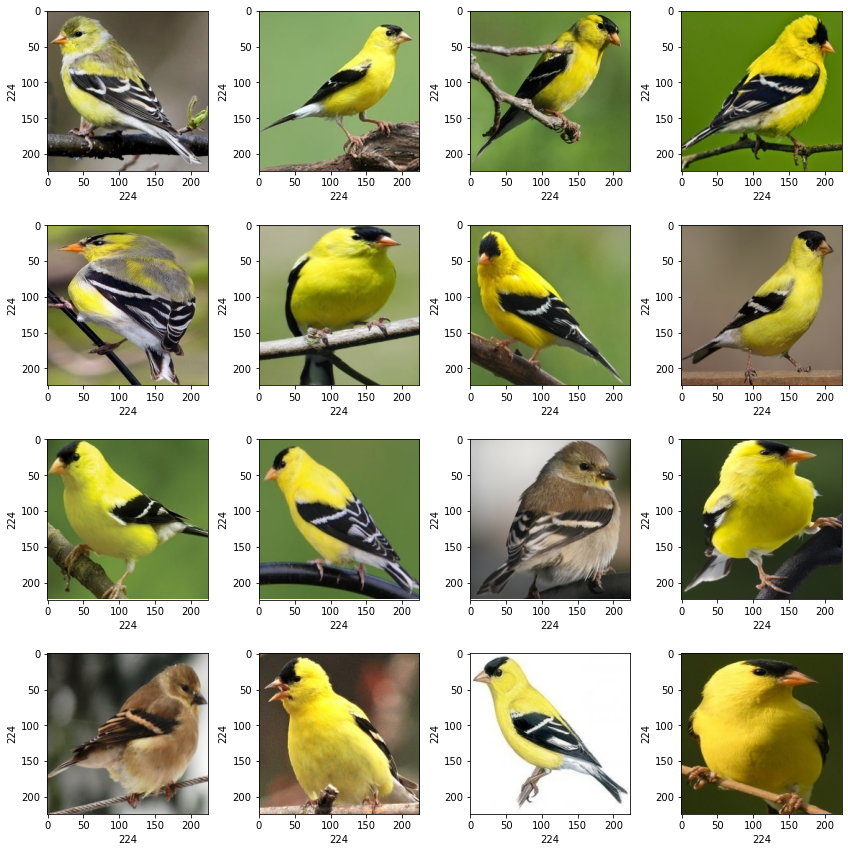

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = r"C:\Users\shive\Untitled Folder 13\birds\AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +"\\"+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

Let's visualize some of the bird images that we will be working on. Also we will observe x and y dimensions of the image.

In [ ]:
# Setting path and creating empty list
# dir = r"D:\chem rxn\Collab+Code (3)\Collab Code\Data"
dir=r"D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset"
print(dir)
root_dir = listdir(dir)
print(root_dir)
image_list, label_list = [], []


D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset
['AMERICAN GOLDFINCH', 'BARN OWL', 'CARMINE BEE-EATER', 'DOWNY WOODPECKER', 'EMPEROR PENGUIN', 'FLAMINGO']


In [ ]:
# listdir(f"{dir}/{directory}")

In [ ]:
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        print( f"{dir}/{directory}/{files}" )

D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/001.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/002.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/003.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/004.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/005.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/006.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/007.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/008.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/009.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees Dataset/AMERICAN GOLDFINCH/010.jpg
D:\chem rxn\Collab+Code (3)\Collab Code\Data\Bird Speciees D

In [ ]:
# for i in dir:
#     for j in i:
#         img=cv2.imread(j)
#         image=img_to_array(img)
#         image_list.append(image)
#         label_list.append(directory)


Setting the root directory for the dataset and storing all the floders name of the dataset. We will also create 2 empty list for image and lables.

In [ ]:
# Reading and converting image to numpy array
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
#         print(image_path)
#         for img in listdir(f"{dir}/{directory}/{files}"):
        image = cv2.imread(image_path) #f"{dir}/{directory}/{files}/{img}"
       # print(image)
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

In [ ]:
# listdir(f"{dir}/{directory}/{files}")

In [ ]:
image_list

[array([[[ 93., 109., 116.],
         [ 94., 110., 117.],
         [ 95., 111., 118.],
         ...,
         [ 96., 111., 120.],
         [ 96., 112., 119.],
         [ 98., 114., 121.]],
 
        [[ 93., 109., 116.],
         [ 94., 110., 117.],
         [ 94., 110., 117.],
         ...,
         [ 94., 109., 118.],
         [ 95., 111., 118.],
         [ 96., 112., 119.]],
 
        [[ 93., 108., 117.],
         [ 94., 109., 118.],
         [ 93., 108., 117.],
         ...,
         [ 97., 112., 121.],
         [ 98., 114., 121.],
         [ 99., 115., 122.]],
 
        ...,
 
        [[ 78.,  94.,  93.],
         [ 77.,  93.,  92.],
         [ 76.,  91.,  93.],
         ...,
         [153., 156., 161.],
         [153., 156., 161.],
         [153., 156., 161.]],
 
        [[ 83.,  97.,  96.],
         [ 81.,  95.,  94.],
         [ 77.,  92.,  94.],
         ...,
         [153., 156., 160.],
         [153., 156., 160.],
         [152., 155., 159.]],
 
        [[ 84.,  98.,  97.],
 

Next we will read all the images and convert it into array and appending the list created above with the image and its label.

In [ ]:
label_list

['AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN 

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

Check for class imbalance.

In [ ]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

Next we will find out the number of classes that we will be working on.

In [ ]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

Checking the size of the single image.

In [ ]:
# Checking labels shape
label_list = np.array(label_list)
label_list.shape

(811,)

Checking the shape of image labels which will be equal to the number of images we are going to work with.

In [ ]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.25, random_state = 10)

Now we will split the data into training and testing using train_test_split() of sklearn.

In [ ]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

Next we will normalize the images by dividing them with 255. Also, we will reshape x_train and x_test.

In [ ]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


Next we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes.

In [ ]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Now we will split the training data to validation and training data.

In [ ]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel). In the last layer we will use softmax as the activation function because it is a multi class classification problem.

In [ ]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

While compiling the model we need to set the type of loss which will be Categorical Crossentropy for our model alongwith this we also need to set the optimizer and the metrics respectively.

In [ ]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
4/4 [==============================] - 5s 1s/step - loss: 1.7753 - accuracy: 0.2305 - val_loss: 1.7188 - val_accuracy: 0.3197
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 1.6338 - accuracy: 0.4095 - val_loss: 1.5397 - val_accuracy: 0.4508
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 1.4776 - accuracy: 0.5000 - val_loss: 1.3987 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 1.3170 - accuracy: 0.5658 - val_loss: 1.2703 - val_accuracy: 0.6148
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 1.1655 - accuracy: 0.6687 - val_loss: 1.1312 - val_accuracy: 0.6885
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 1.0172 - accuracy: 0.6996 - val_loss: 1.0198 - val_accuracy: 0.6803
Epoch 7/50
4/4 [==============================] - 5s 1s/step - loss: 0.8938 - accuracy: 0.7202 - val_loss: 0.8964 - val_accuracy: 0.7213
Epoch 8/50
4/4 [=========================

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 50 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy but here we can see that the model has already reached a very high accuracy so we don't need to run it for more. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [ ]:
# Saving model
model.save("bird_species.h5")

Now we will save the model in h5 format to use it later for prediction.

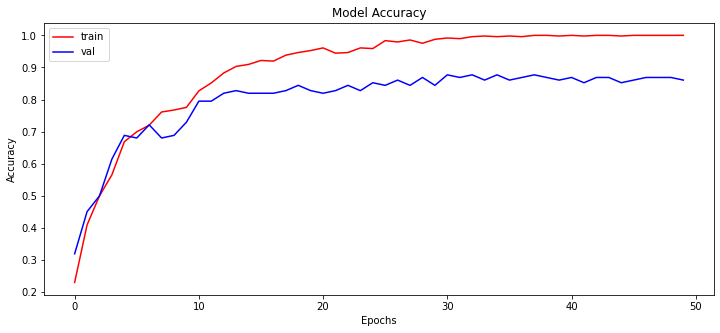

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the accuracy of the model for the training history.

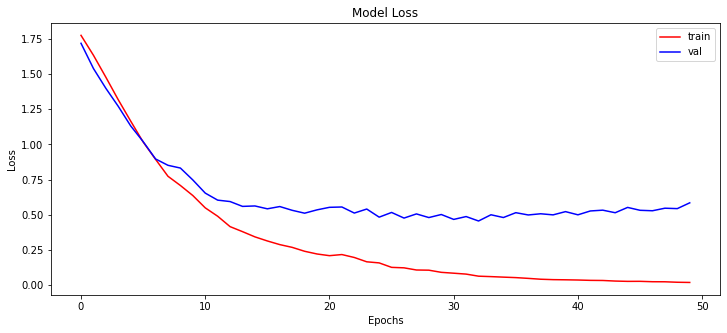

In [ ]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

7/7 [==============================] - 1s 121ms/step - loss: 0.4014 - accuracy: 0.8522
Test Accuracy: 85.22167205810547


Evaluating the model to know the accuracy of the model on the test data.

In [ ]:
# Storing predictions
y_pred = model.predict(x_test)

Here we are storing prediction on test data.

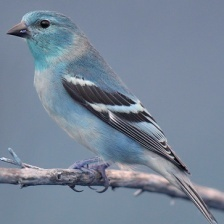

In [ ]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

Visualizing one of the image which we will be further used for prediction.

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  AMERICAN GOLDFINCH
Predicted :  AMERICAN GOLDFINCH


Now, we will create list of labels using object of label binarizer. We will print that list and finally we will print out the prediction and the original label of the image we visualized above using argmax().

# Project takeaway and Conclusion:

The dataset was first loaded into Google Colab via Google Drive, and the photos were then visualised. When working with any kind of dataset, normalising is a crucial step. After that, using the image provided to the model, we constructed a CNN Model that is then used to predict the bird species.

The project gave a good hands on experience on Machine learning and image classification based problem.